In [1]:
pip install astropy scipy matplotlib numpy h5py tqdm numba pint-pulsar emcee corner statsmodels pyfftw tbb

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pytest pytest-astropy jinja2 docutils sphinx-astropy nbsphinx pandoc ipython jupyter notebook towncrier tox black

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install stingray

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from stingray import Lightcurve, Crossspectrum, AveragedCrossspectrum

import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
font_prop = font_manager.FontProperties(size=16)

/opt/conda/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


# week 2 simulating light curves
we start by simulating two sine waves with a little bit of added gaussian noise which we are able to adjust we preset the resolution , frequency, exposure, and the phase lag which is what we will determine with the cross spectrum 

In [5]:
#create signal
dt = 0.1  # seconds
exposure = 1001.  # seconds
times = np.arange(1, exposure, dt)  # seconds
frequency = 2
phase_lag = np.pi / 3

signal_1 = 5*np.sin(2.*np.pi*times*frequency) + 5   # counts/s
signal_2 = 5*np.sin(2.*np.pi*times*frequency - phase_lag) + 5   # counts/s

In [6]:
lc1 = Lightcurve(times, np.random.normal(signal_1, 0.03))
lc2 = Lightcurve(times, np.random.normal(signal_2, 0.03))

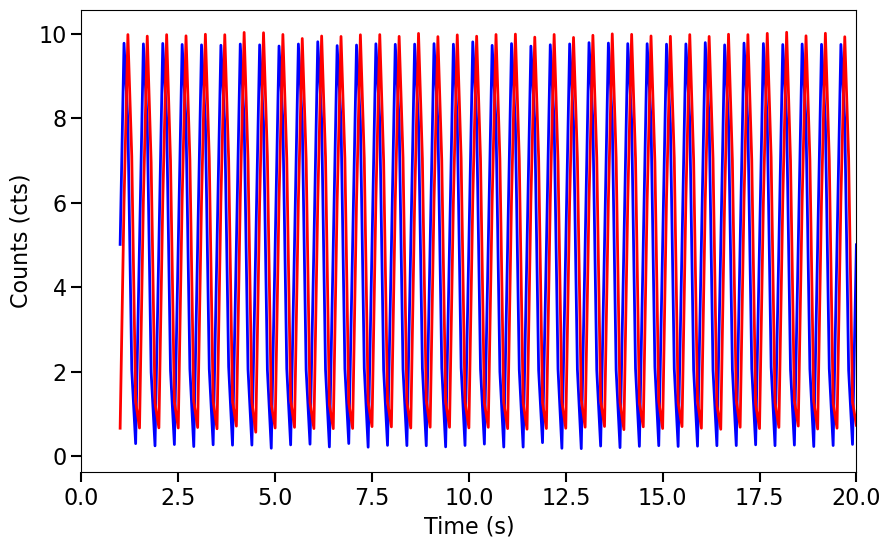

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(lc1.time, lc1.counts, lw=2, color='blue')
ax.plot(lc2.time, lc2.counts, lw=2, color='red')
ax.set_xlim(0,20)
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
plt.show()

In [8]:
#get cross spectrum and averaged cross spectrum and normalise
cs = Crossspectrum.from_lightcurve(lc1, lc2)
avg_cs = AveragedCrossspectrum.from_lightcurve(lc1, lc2, 10., norm='frac')

/opt/conda/lib/python3.11/site-packages/stingray/fourier.py:1125: UserWarning: n_ave is below 30. Please note that the error bars on the quantities derived from the cross spectrum are only reliable for a large number of averaged powers.
  warnings.warn(
100it [00:00, 7277.36it/s]
/opt/conda/lib/python3.11/site-packages/stingray/fourier.py:1139: RuntimeWarning: invalid value encountered in sqrt
  dRe = dIm = dG = np.sqrt(power_over_2n * (seg_power - frac))
/opt/conda/lib/python3.11/site-packages/stingray/fourier.py:1141: RuntimeWarning: invalid value encountered in sqrt
  dphi = np.sqrt(
/opt/conda/lib/python3.11/site-packages/stingray/crossspectrum.py:2912: UserWarning: Some error bars in the Averaged Crossspectrum are invalid.Defaulting to sqrt(2 / M) in Leahy norm, rescaled to the appropriate norm.
  warnings.warn(


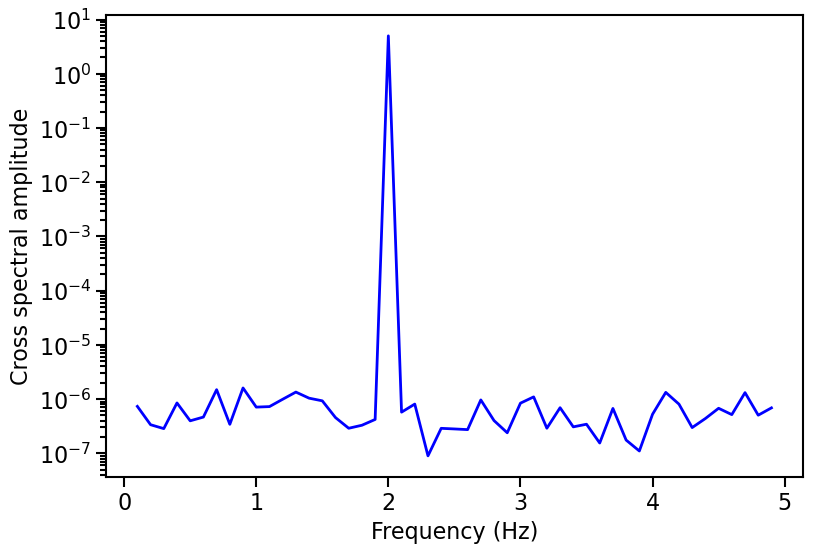

In [9]:
avg_cs_amplitude = np.abs(avg_cs.power)

fig, ax1 = plt.subplots(1,1,figsize=(9,6))
ax1.plot(avg_cs.freq, avg_cs_amplitude, lw=2, color='blue')
ax1.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("Cross spectral amplitude", fontproperties=font_prop)
ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
plt.show()

In [10]:
#logarithmically rebin
log_rb_cs = avg_cs.rebin_log(f=0.02)

In [11]:
#find lags 
freq_lags, freq_lags_err = avg_cs.time_lag()
freq_plags, freq_plags_err = avg_cs.phase_lag()

# Expected time lag, given the input time lag
time_lag = phase_lag / (2. * np.pi * avg_cs.freq)


/opt/conda/lib/python3.11/site-packages/stingray/crossspectrum.py:1951: RuntimeWarning: invalid value encountered in sqrt
  lag_err = np.sqrt(dum / self.m)


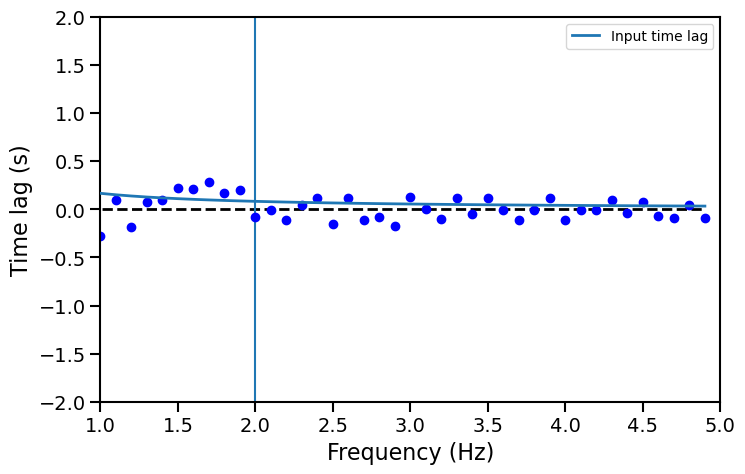

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.hlines(0, avg_cs.freq[0], avg_cs.freq[-1], color='black', linestyle='dashed', lw=2)
ax.errorbar(avg_cs.freq, freq_lags, yerr=freq_lags_err,fmt="o", lw=1, color='blue')
ax.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax.set_ylabel("Time lag (s)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
# plt.semilogx()
plt.axvline(frequency)
plt.xlim([1, 5])
plt.ylim([-2, 2])
plt.plot(avg_cs.freq, time_lag, label="Input time lag", lw=2, zorder=10)
plt.legend()
plt.show()

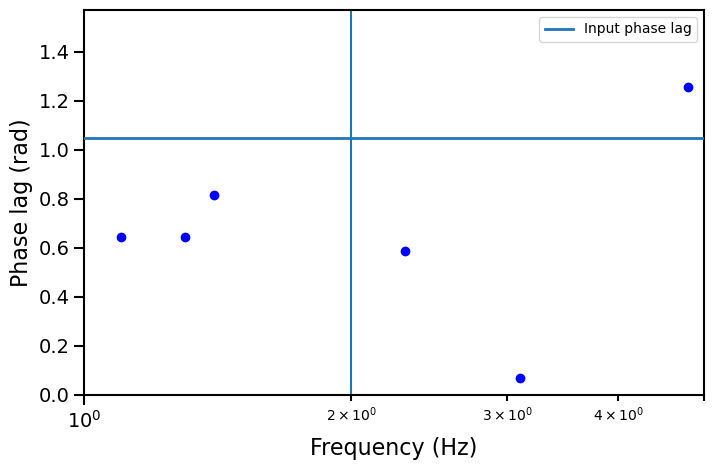

In [13]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.hlines(0, avg_cs.freq[0], avg_cs.freq[-1], color='black', linestyle='dashed', lw=2)
ax.errorbar(avg_cs.freq, freq_plags, yerr=freq_plags_err,fmt="o", lw=1, color='blue')
ax.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax.set_ylabel("Phase lag (rad)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
plt.semilogx()
plt.axvline(frequency)
plt.xlim([1, 5])
plt.ylim([0, np.pi/ 2])
plt.axhline(phase_lag, label="Input phase lag", lw=2, zorder=10)
plt.legend()
plt.show()


# creating a lightcurve based on the BLR log normal impulse response 
now we will simulate the contribution to these light curves frm the BLR by creating a light curve representing this contribution 
we will then make a another sine wave light curev and convolve these two to find the lag between teh convolution and orginal light curve


# creating realistic light curves based on a PSD 

In [14]:
import os

directory_path = '/home/jovyan/AS4013'
file_path = os.path.join(directory_path, 'lightcurve.dat')

column_index1 = 0  
column_index2 = 1

with open(file_path, 'r') as file:
    # Read all lines
    lines = file.readlines()
    data_lines = lines[1:]
    
   # Extract the desired columns from each line and convert to float
    column1_data = [float(line.split()[column_index1]) for line in data_lines]
    column2_data = [float(line.split()[column_index2]) for line in data_lines]

time = np.array(column1_data)/(24*3600)
flux = np.array(column2_data)

In [15]:
dt = 21600  # seconds corresponds to 6 hours
exposure = 1400  #length of array = days/6hours
times = (np.linspace(1, exposure+1, num = 1400)*dt)/(24*3600) # converted to days
S = 1
M = np.log(13.9)
#frequency = 2


BLR = 1/(S*np.sqrt(2*np.pi*times))*np.exp(-(np.log(times)-M)**2/(2*(S**2)))





In [16]:
#S = 1.0
#M = np.log(13.9)


#def BLR(time):
    #return 1/(S*np.sqrt(2*np.pi*time))*np.exp(-(np.log(time)-M)**2/(2*(S**2)))

#BLR_array = BLR(time)
#len(BLR_array)

In [17]:
# Perform convolution
signal4_BLR = np.convolve(flux, BLR, mode='full')
signal4_BLR = signal4_BLR[100:1300]
print(signal4_BLR)

[ 51.54870348  51.89637114  52.2420701  ... 173.96190829 173.67987269
 173.39949071]


In [18]:
flux = flux[100:1300]
time = time[100:1300]

lc4_BLR = Lightcurve(time,signal4_BLR )
lc4 = Lightcurve(time,flux)

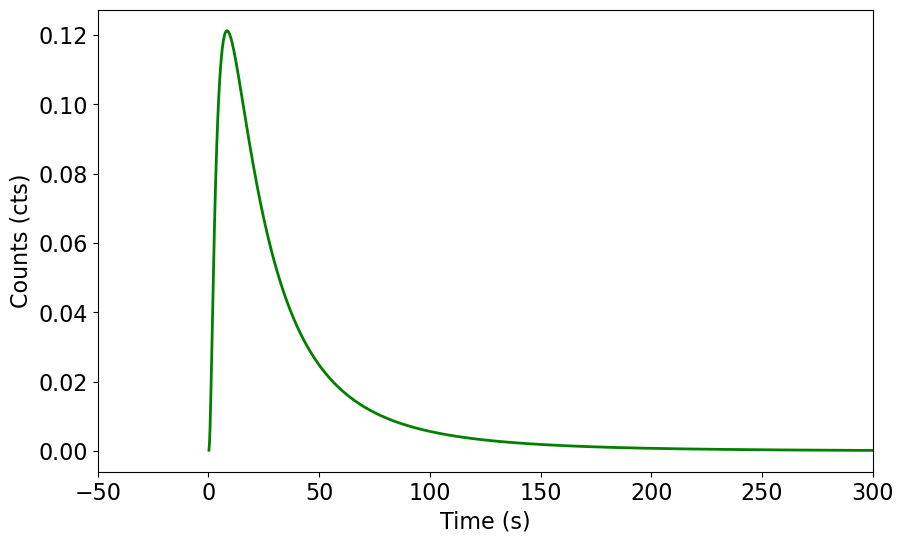

In [19]:
#plot of BLR 
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(times, BLR, lw=2, color='green')
ax.set_xlim(-50,300)
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

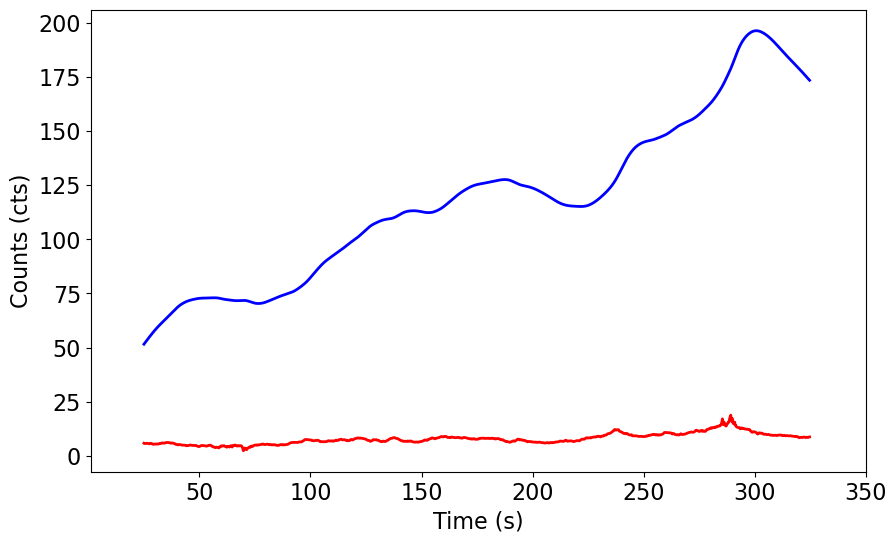

In [20]:
#plot of PSD based light curve
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(lc4.time, lc4.counts, lw=2, color='red')
ax.plot(lc4_BLR.time, lc4_BLR.counts, lw=2, color='blue')
ax.set_xlim(1,350)
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

# WEEK 3

start by normalising the BLR signal 4 light curve 

### Normalise 

In [21]:
#getting mean 
mean_lc4_BLR = np.mean(lc4_BLR.counts)
mean_lc4 = np.mean(lc4.counts)
mean_BLR = np.mean(lc4.counts)

#getting standard deviation
sd_lc4_BLR = np.std(lc4_BLR.counts)
sd_lc4 = np.std(lc4.counts)

# define gaussian noise 
SN = 100

#normalising
lc4_BLRN = (lc4_BLR.counts-mean_lc4_BLR)/sd_lc4_BLR
lc4N = (lc4.counts-mean_lc4)/sd_lc4

# and adding noise
lc4_BLR_N = np.random.normal(lc4_BLRN,abs(lc4_BLRN/SN))
lc4_N = np.random.normal(lc4N,abs(lc4N/SN))

lc4_BLR_N = Lightcurve(lc4_BLR.time,lc4_BLR_N)
lc4_N = Lightcurve(lc4.time,lc4_N)

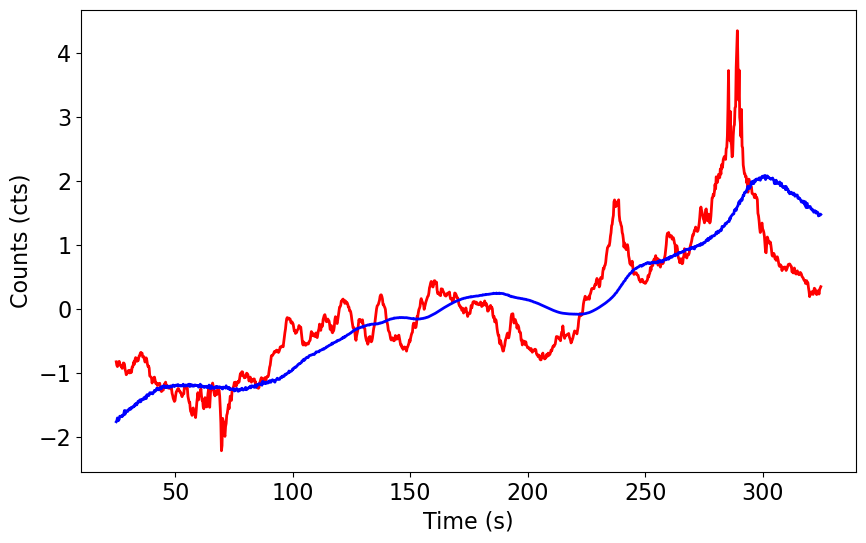

In [22]:
#plot of PSD based light curve
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(lc4_N.time, lc4_N.counts, lw=2, color='red')
ax.plot(lc4_BLR_N.time, lc4_BLR_N.counts, lw=2, color='blue')
#ax.set_xlim(1,350)
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

we see it drops down to negative around 500 thus we cut our light curve off before this 

In [23]:
lc4_BLR_N_cut = lc4_BLR_N
lc4_N_cut = lc4_N

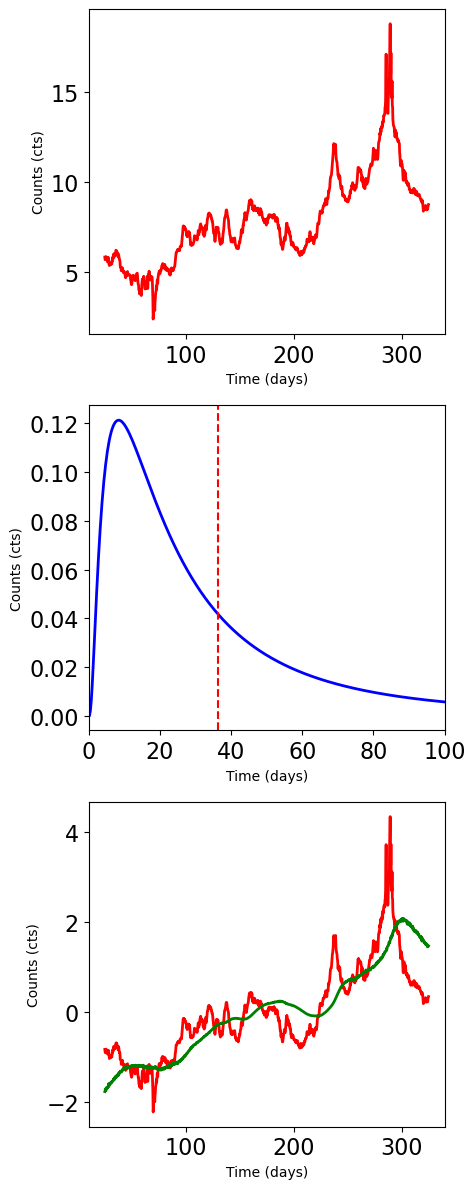

In [45]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 12))

axes[0].plot(time, lc4, lw=2, color='red')
axes[0].set_xlabel("Time (days)" )
axes[0].set_ylabel("Counts (cts)")
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)

axes[1].plot(times, BLR, lw=2, color='blue')
axes[1].axvline(x=36.3, color='r', linestyle='--', label='Vertical Line')
axes[1].set_xlabel("Time (days)" )
axes[1].set_ylabel("Counts (cts)" )
axes[1].set_xlim(0,100)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)

axes[2].plot( lc4_N.time, lc4_N.counts, lw=2, color='red')
axes[2].plot( lc4_BLR_N.time,lc4_BLR_N.counts, lw=2, color='green')
axes[2].set_xlabel("Time (days)")
axes[2].set_ylabel("Counts (cts)")
axes[2].tick_params(axis='x', labelsize=16)
axes[2].tick_params(axis='y', labelsize=16)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show or save the figure
plt.show()

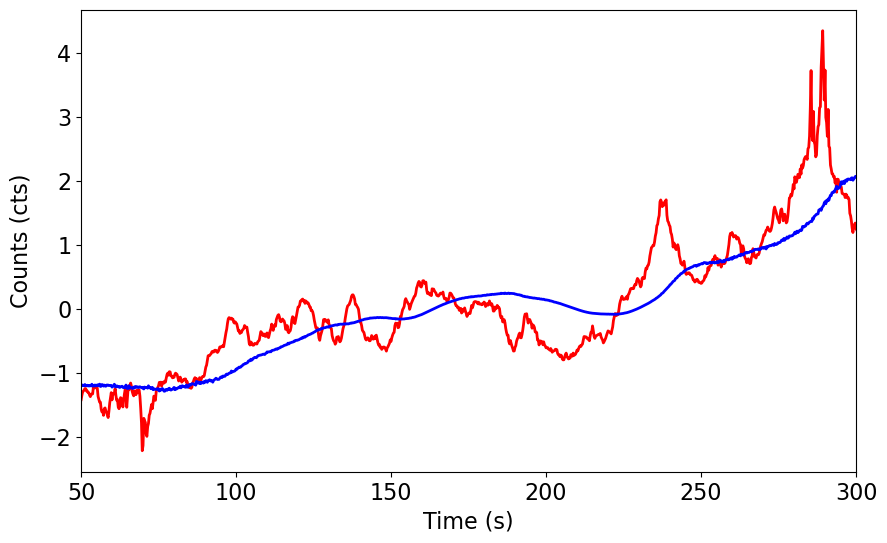

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(lc4_N_cut.time, lc4_N_cut.counts, lw=2, color='red')
ax.plot(lc4_BLR_N_cut.time, lc4_BLR_N_cut.counts, lw=2, color='blue')
ax.set_xlim(50,300)
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()


In [26]:
#average cross spectrum 
avg_cs_BLR4_N = AveragedCrossspectrum.from_lightcurve(lc4_BLR_N_cut, lc4_N_cut, 150.)
#logarithmically rebin 
log_rb_cs4_N = avg_cs_BLR4_N.rebin_log(f=1.2)

2it [00:00, 1060.91it/s]
/opt/conda/lib/python3.11/site-packages/stingray/fourier.py:1914: RuntimeWarning: invalid value encountered in sqrt
  n_ph = np.sqrt(n_ph1 * n_ph2)
/opt/conda/lib/python3.11/site-packages/stingray/fourier.py:1125: UserWarning: n_ave is below 30. Please note that the error bars on the quantities derived from the cross spectrum are only reliable for a large number of averaged powers.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/stingray/fourier.py:1139: RuntimeWarning: invalid value encountered in sqrt
  dRe = dIm = dG = np.sqrt(power_over_2n * (seg_power - frac))
/opt/conda/lib/python3.11/site-packages/stingray/fourier.py:1141: RuntimeWarning: invalid value encountered in sqrt
  dphi = np.sqrt(
/opt/conda/lib/python3.11/site-packages/stingray/crossspectrum.py:2912: UserWarning: Some error bars in the Averaged Crossspectrum are invalid.Defaulting to sqrt(2 / M) in Leahy norm, rescaled to the appropriate norm.
  warnings.warn(
/opt/conda/lib/python3.11

In [27]:
freq_lags4_N, freq_lags_err4_N = log_rb_cs4_N.time_lag()
freq_plags4_N, freq_plags_err4_N = log_rb_cs4_N.phase_lag()

/opt/conda/lib/python3.11/site-packages/stingray/utils.py:406: UserWarning: SIMON says: Number of segments used in averaging is significantly low. The result might not follow the expected statistical distributions.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


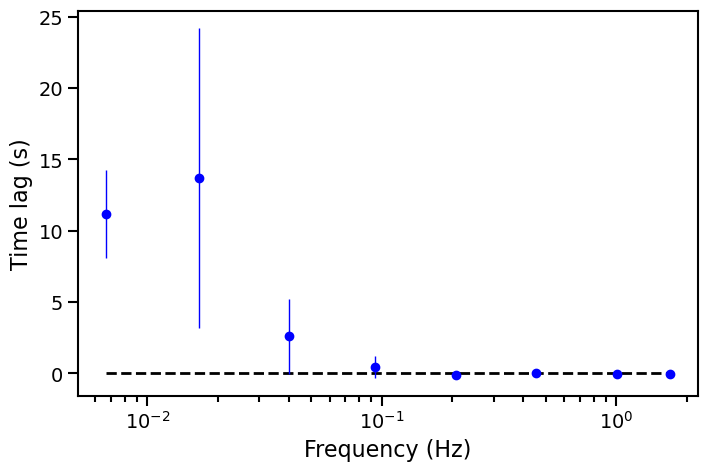

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.hlines(0, log_rb_cs4_N.freq[0], log_rb_cs4_N.freq[-1], color='black', linestyle='dashed', lw=2)
ax.errorbar(log_rb_cs4_N.freq, freq_lags4_N, yerr=freq_lags_err4_N,fmt="o", lw=1, color='blue')
ax.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax.set_ylabel("Time lag (s)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
plt.semilogx()


plt.show()

# mean tau 
calculating the mean tau from the BLR function 

In [29]:
dt = 21600  # seconds corresponds to 6 hours
exposure = 1400  #length of array = days/6hours
times = (np.linspace(1, exposure+1, num = 1400)*dt)/(24*3600) # converted to days


# Define your function
def BLR_function(times):

    return 1/(S*np.sqrt(2*np.pi*times))*np.exp(-(np.log(times)-M)**2/(2*(S**2)))

  # Example function, you can replace this with your own function


# Apply the function to each element in the array
BLR_array = BLR_function(times)

# Calculate the weighted mean
#mean_lag = np.sum(lc4_BLR_N_cut.time * lc4_BLR_N_cut.counts) / np.sum(lc4_BLR_N_cut.counts)
mean_lag = np.sum(BLR_array * times) / np.sum(BLR_array)

print("Mean Lag:", mean_lag)

Mean Lag: 36.310402004508404


# PYCCF
using py cff to find the mean tau 

In [30]:
%cd /home/jovyan/AS4013/PYCCF

/home/jovyan/AS4013/PYCCF


In [31]:
#!python setup.py build_ext --inplace
len(lc4_BLR_N_cut.counts)

1200

In [32]:
import shutil

# Replace '/path/to/work_directory' with your actual work directory
work_directory = '/home/jovyan/AS4013'

# Copy xcorspc.so and PYCCF.py to the work directory
shutil.copy('xcorspc.pyx', work_directory)
shutil.copy('PYCCF.py', work_directory)


'/home/jovyan/AS4013/PYCCF.py'

In [33]:
import sys
import argparse
import PYCCF as myccf

#########################################
##Set Interpolation settings, user-specified
#########################################
lag_range = [-100, 100]  #Time lag range to consider in the CCF (days). Must be small enough that there is some overlap between light curves at that shift (i.e., if the light curves span 80 days, these values must be less than 80 days)
interp = 0.2 #Interpolation time step (days). Must be less than the average cadence of the observations, but too small will introduce noise.
nsim = 300  #Number of Monte Carlo iterations for calculation of uncertainties
mcmode = 0  #Do both FR/RSS sampling (1 = RSS only, 2 = FR only) 
sigmode = 0.2  #Choose the threshold for considering a measurement "significant". sigmode = 0.2 will consider all CCFs with r_max <= 0.2 as "failed". See code for different sigmodes.


In [34]:

##########################################
#Calculate lag with python CCF program
##########################################

mjd2 = lc4_BLR_N_cut.time
flux2 = lc4_BLR_N_cut.counts
mjd1 = lc4_N_cut.time
flux1 = lc4_N_cut.counts 
err1 = abs(flux1*0.1)
err2 = abs(flux2*0.1)

tlag_peak, status_peak, tlag_centroid, status_centroid, ccf_pack, max_rval, status_rval, pval = myccf.peakcent(mjd1, flux1, mjd2, flux2, lag_range[0], lag_range[1], interp)
tlags_peak, tlags_centroid, nsuccess_peak, nfail_peak, nsuccess_centroid, nfail_centroid, max_rvals, nfail_rvals, pvals = myccf.xcor_mc(mjd1, flux1, abs(err1), mjd2, flux2, abs(err2), lag_range[0], lag_range[1], interp, nsim = nsim, mcmode=mcmode, sigmode = 0.2)

lag = ccf_pack[1]
r = ccf_pack[0]

perclim = 84.1344746  

print(tlag_centroid,tlag_peak)

Failed centroids:  0
Failed peaks:  0
25.949372259543956 16.600000000000858


In [35]:
from scipy import stats 

###Calculate the best peak and centroid and their uncertainties using the median of the
##distributions. 
centau = stats.scoreatpercentile(tlags_centroid, 50)
centau_uperr = (stats.scoreatpercentile(tlags_centroid, perclim))-centau
centau_loerr = centau-(stats.scoreatpercentile(tlags_centroid, (100.-perclim)))
print ('Centroid, error: %10.3f  (+%10.3f -%10.3f)'%(centau, centau_loerr, centau_uperr))

peaktau = stats.scoreatpercentile(tlags_peak, 50)
peaktau_uperr = (stats.scoreatpercentile(tlags_peak, perclim))-centau
peaktau_loerr = centau-(stats.scoreatpercentile(tlags_peak, (100.-perclim)))
print ('Peak, errors: %10.3f  (+%10.3f -%10.3f)'%(peaktau, peaktau_uperr, peaktau_loerr))

Centroid, error:     25.711  (+     1.124 -     0.873)
Peak, errors:     15.800  (+    -8.311 -    11.111)


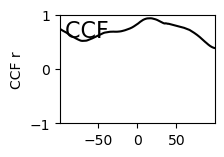

In [39]:
##########################################
#Plot the Light curves, CCF, CCCD, and CCPD
##########################################

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace = 0.1)

#Plot CCF Information
xmin, xmax = -99, 99
ax2 = fig.add_subplot(3, 3, 7)
ax2.set_ylabel('CCF r')
ax2.text(0.2, 0.85, 'CCF ', horizontalalignment = 'center', verticalalignment = 'center', transform = ax2.transAxes, fontsize = 16)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-1.0, 1.0)
ax2.plot(lag, r, color = 'k')


# Include noise value in the filename
#filename = 'PYCCF_plot_%s' % str(SN)+'.png'
#plt.savefig(filename)
#plt.close(fig)

plt.show()

Lightcurve
__________
Lightcurve
__________


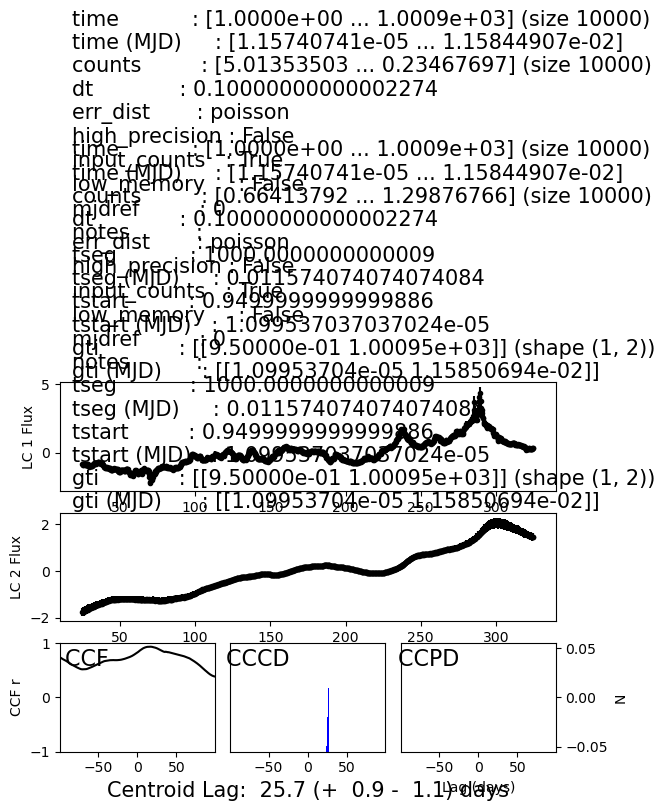

In [36]:
##########################################
#Plot the Light curves, CCF, CCCD, and CCPD
##########################################

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace = 0.1)

#Plot lightcurves
ax1 = fig.add_subplot(3, 1, 1)
ax1.errorbar(mjd1, flux1, yerr = err1, marker = '.', linestyle = ':', color = 'k', label = 'LC 1 (Continuum)')
ax1_2 = fig.add_subplot(3, 1, 2, sharex = ax1)
ax1_2.errorbar(mjd2, flux2, yerr = err2, marker = '.', linestyle = ':', color = 'k', label = 'LC 2 (Emission Line)')

ax1.text(0.025, 0.825, lc1, fontsize = 15, transform = ax1.transAxes)
ax1_2.text(0.025, 0.825, lc2, fontsize = 15, transform = ax1_2.transAxes)
ax1.set_ylabel('LC 1 Flux')
ax1_2.set_ylabel('LC 2 Flux')
ax1_2.set_xlabel('MJD')

#Plot CCF Information
xmin, xmax = -99, 99
ax2 = fig.add_subplot(3, 3, 7)
ax2.set_ylabel('CCF r')
ax2.text(0.2, 0.85, 'CCF ', horizontalalignment = 'center', verticalalignment = 'center', transform = ax2.transAxes, fontsize = 16)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-1.0, 1.0)
ax2.plot(lag, r, color = 'k')

ax3 = fig.add_subplot(3, 3, 8, sharex = ax2)
ax3.set_xlim(xmin, xmax)
ax3.axes.get_yaxis().set_ticks([])
ax3.set_xlabel('Centroid Lag: %5.1f (+%5.1f -%5.1f) days'%(centau, centau_uperr, centau_loerr), fontsize = 15) 
ax3.text(0.2, 0.85, 'CCCD ', horizontalalignment = 'center', verticalalignment = 'center', transform = ax3.transAxes, fontsize = 16)
n, bins, etc = ax3.hist(tlags_centroid, bins = 50, color = 'b')

ax4 = fig.add_subplot(3, 3, 9, sharex = ax2)
ax4.set_ylabel('N')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right') 
ax4.set_xlabel('Lag (days)')
ax4.set_xlim(xmin, xmax)
ax4.text(0.2, 0.85, 'CCPD ', horizontalalignment = 'center', verticalalignment = 'center', transform = ax4.transAxes, fontsize = 16)
ax4.hist(tlags_peak, bins = bins, color = 'b')

# Include noise value in the filename
#filename = 'PYCCF_plot_%s' % str(SN)+'.png'
#plt.savefig(filename)
#plt.close(fig)

plt.show()

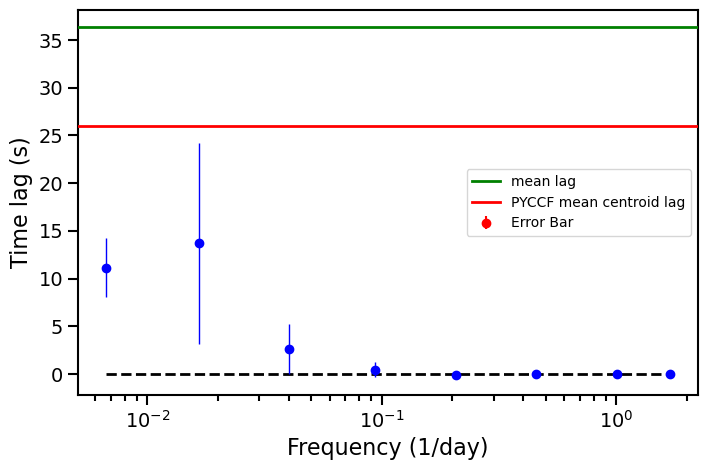

In [37]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.hlines(0, log_rb_cs4_N.freq[0], log_rb_cs4_N.freq[-1], color='black', linestyle='dashed', lw=2)
ax.errorbar(log_rb_cs4_N.freq, freq_lags4_N, yerr=freq_lags_err4_N,fmt="o", lw=1, color='blue')
ax.set_xlabel("Frequency (1/day)", fontproperties=font_prop)
ax.set_ylabel("Time lag (s)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
plt.semilogx()
plt.axhline(mean_lag, label="mean lag", lw=2, color='green', zorder=10)
plt.axhline(tlag_centroid, label="PYCCF mean centroid lag", lw=2, color='red', zorder=10)
plt.errorbar(x=0, y=tlag_centroid, yerr=[[centau_uperr],[centau_loerr]], color='red', fmt='o', label='Error Bar')
plt.legend()


# Include noise value in the filename
filename = os.path.join('FreqLag_plot_%s' % str(SN)+'.png')
plt.savefig(filename,format = 'png', orientation = 'landscape', bbox_inches = 'tight')

plt.show()

### Now to create a code which will randomly sample 